In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def get_slopes(line, m):

    x1, y1, x2, y2 = line[0]
    if (x2-x1) != 0:
        m.append((y2 - y1) / (x2 - x1))
    else:
        print("You monster!") #this would never really happen, never perfectly vertical

def get_intercepts(line, ints):
    x1, y1, x2, y2 = line[0]
    m=(y2 - y1) / (x2 - x1)
    ints.append(((0-y1)/m) + x1)

In [1]:
def detect_lines(img, thresh1, thresh2, aperture_Size, min_LineLength, max_LineGap):
    gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(gray, thresh1, thresh2, apertureSize=aperture_Size)
    lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                np.pi/180,
                100,
                minLineLength=min_LineLength, #down goes more frequent, up goes less 300
                maxLineGap=max_LineGap, #inverse relation 30
        ) # detect lines
    return (lines)

In [79]:
def detect_lanes(line_list):
    slopes = []
    intercepts = []
    valid_list1 = []
    valid_list2 = []
    lane_list = []
    indices = []
    mlist = []
    for line in line_list:
        get_slopes(line, slopes)
        get_intercepts(line, intercepts)
    
    print(slopes)
    print(intercepts)    
    
    slopes.sort()
    intercepts.sort()

    print(slopes)
    print(intercepts)   

    
    i=0
    for slope in slopes:
        if i == len(slopes) - 1:
            break
        '''
        if i == 0:
            continue
        if (slopes[i + 1] - slopes[i] < 100) and (intercepts[i + 1] - intercepts[i] < 600):
            valid_list1.append([line[i], line[i-1]])
        else:
            continue
        '''
        #print([lines[0, i], lines[0, i+1]])
        if slope >= 1.5:
            valid_list1.append([line_list[i], line_list[i+1]])
            i += 1
    

        

    
    '''
    for j in range(len(valid_list1)):
        pass
    '''
    print(valid_list1)
    return valid_list1

In [80]:
def Line_drawer(img, t1, t2):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray, 30, 70) # detect edges using edge intensity of the gray version of the image.jpg,
    #  it detects the edges by establishing a color gradient along edges and using those gradients to define thin lines where edges should be,
    #  whether or not they are edges is then defined by whether the intensity of the shift in gradient is above or below certain thresholds
    #  that you define when calling Canny, so the second value you input is defined as the minimum threshold for gradient intensity,
    #  which if any edges have an intensity lower than that they are discarded, the second threshold is the maximum intensity, 
    #  which establishes that for any edges with a greater gradient intensity they are instantly accepted as edges, 
    #  and if some edges are in-between the thresholds, they are defined as edges or not based on whether they touch pixels that are a part of the edges.
    #  for the parameters I would suggest anywhere from 55-80 to 50-110


    slope_list=[]
    line_list=[]

    color_order=[(0,255,0),(0,0,255),(255,0,0),(100,100,100),(0,0,0),(150,30,90),(180,50,20)] #Color cycle list
    color_order=[(0,255,0),(0,255,0),(0,255,0),(0,255,0),(0,255,0),(0,255,0),(0,255,0)] # In case you want all green, yes this is a backwards solution
    i=0
    j=0

    #lines = cv2.HoughLinesP(edges,10,np.pi/210,10,minLineLength=100,maxLineGap=20,) 
    lines = detect_lines(img, t1, t2, 3, 100, 20)
    lanes = detect_lanes(lines)
    print(lanes)
    # # detect lines
    # takes in edges, an array of lines mapped in cartesian space onto the image resolution
    # also takes in Rho which is distance resolution
    # then it takes in Theta which is angular pixel resolution, note: only seems to work for pi/(k*30) values, where k is some natural number, idk why
    # then it takes in a threshold for lines it will show, only lines that get more than the thresholds votes will be shown. suggest to be 10
    # then it takes in minLineLength which states the minimum length required in pixels for a line to be shown
    # then it takes in maxLineGap which states the maximum distance between two lines in points in a line for those points to be considered apart of a single line


    if lines is not None:
        for line in lines:
            if line is not None and len(line) != 0:
                x1, y1, x2, y2 = line[0]
                cv2.line(img, (x1, y1), (x2, y2), (255,0, 0), 2)
                if (x2-x1)==0:
                    x2+=.01
                    
                #slope=(y2-y1)/(x2-x1)
                #slope_list.append(slope)
                #line_list.append(([x1,y1,x2,y2]))
                #i+=1
                #i=i%6
                #j+=1

                # for k in range(len(slope_list)):
                #     if np.abs(slope)>.9:
                #         if round(slope,2) ==round(slope_list[k],2):
                #             (cv2.line(img,(x1,y1),(line_list[k][2],line_list[k][3]),color_order[i],10))
                #         else:
                ##return(img) used to be here but after moving it out I now get like 200 lines, before the problem was that my plotter would only show one line so maybe this will fix it
            else:
                pass
        else:
            pass
        return(img)

[1.7378640776699028, 1.739884393063584, 3.302325581395349, 0.42386831275720166, 1.7384615384615385, 0.42, 3.2962962962962963]
[370.6145251396648, 369.96013289036546, 416.943661971831, 86.11650485436894, 371.3274336283186, 78.14285714285711, 415.8988764044944]
[0.42, 0.42386831275720166, 1.7378640776699028, 1.7384615384615385, 1.739884393063584, 3.2962962962962963, 3.302325581395349]
[78.14285714285711, 86.11650485436894, 369.96013289036546, 370.6145251396648, 371.3274336283186, 415.8988764044944, 416.943661971831]
[[array([[591, 383, 797, 741]], dtype=int32), array([[624, 442, 797, 743]], dtype=int32)], [array([[624, 442, 797, 743]], dtype=int32), array([[552, 446, 638, 730]], dtype=int32)], [array([[552, 446, 638, 730]], dtype=int32), array([[ 926,  356, 1169,  459]], dtype=int32)], [array([[ 926,  356, 1169,  459]], dtype=int32), array([[560, 328, 690, 554]], dtype=int32)], [array([[560, 328, 690, 554]], dtype=int32), array([[1071,  417, 1221,  480]], dtype=int32)]]
[[array([[591, 38

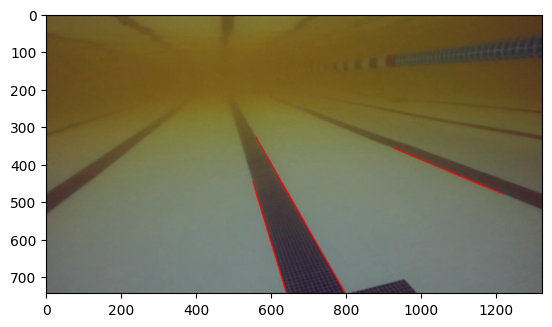

In [81]:
img = cv2.imread('rov_pool.jpg')
plt.imshow(Line_drawer(img, 50, 150))

In [82]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()

[0.422680412371134]
[-499.8292682926831]
[0.422680412371134]
[-499.8292682926831]
[]
[]


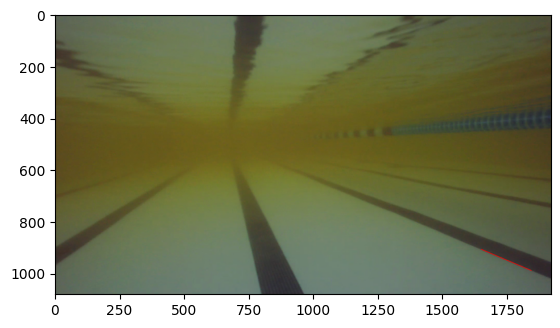

[-1.8120805369127517]
[1381.8962962962964]
[-1.8120805369127517]
[1381.8962962962964]
[]
[]


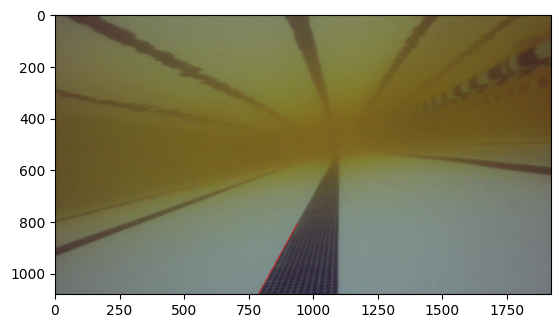

TypeError: 'NoneType' object is not iterable

In [83]:
count=0
frequency=200
pic_list=[]
while ret:
    if count%frequency==0:
        plt.imshow(Line_drawer(frame, 50, 150))
        plt.show()
        count+=1
    count+=1

    ret, frame = cap.read()

In [ ]:
#plt.imshow(Line_drawer(frame))